<a href="https://colab.research.google.com/github/ChawitTe/Finance-SecuritiesIndexSectorPrediction/blob/main/Finance%26SecuritiesIndexSectorPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Importing the Libraries
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
train_df = pd.read_excel("/content/Fin.xlsx")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              72 non-null     datetime64[ns]
 1   THB/USD                           72 non-null     float64       
 2   Down Jones Index                  72 non-null     float64       
 3   Consumer Confidence Index         72 non-null     float64       
 4   United States 10-Year Bond Yield  72 non-null     float64       
 5   United States 2-Year Bond Yield   72 non-null     float64       
 6   CPI                               72 non-null     float64       
 7   FIN Index                         72 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 4.6 KB


In [4]:
train_df

,Date,THB/USD,Down Jones Index,Consumer Confidence Index,United States 10-Year Bond Yield,United States 2-Year Bond Yield,CPI,FIN Index
0,2022-12-01,34.7953,34086.04,50.42,3.879,4.4279,107.86,4505.07
1,2022-11-01,36.4265,33147.25,49.90,3.611,4.3287,107.92,4655.46
2,2022-10-01,37.9204,34589.77,47.70,4.050,4.4865,108.06,4512.96
3,2022-09-01,37.0439,32732.95,46.37,3.829,4.2726,107.70,4450.40
4,2022-08-01,35.8790,28725.51,46.33,3.196,3.4950,107.46,4557.26
...,...,...,...,...,...,...,...,...
67,2017-05-01,34.4515,21349.63,40.30,2.206,1.2858,98.04,2960.14
68,2017-04-01,34.4532,21008.65,36.10,2.289,1.2699,97.90,2852.82
69,2017-03-01,34.9022,20940.51,38.50,2.389,1.2619,97.74,2833.47
70,2017-02-01,35.0172,20663.22,40.40,2.397,1.2640,98.19,3365.40


In [5]:
train_df.describe()

,THB/USD,Down Jones Index,Consumer Confidence Index,United States 10-Year Bond Yield,United States 2-Year Bond Yield,CPI,FIN Index
count,72.000000,72.0000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,32.606653,28032.8625,42.811944,2.096500,1.594951,100.589722,4180.717917
std,1.776704,4531.1033,4.489216,0.857673,1.175675,2.897500,868.724276
min,29.985700,20663.2200,33.300000,0.533000,0.109300,97.170000,2833.470000
25%,31.305450,24795.8350,39.350000,1.497250,0.274400,98.867500,3520.625000
50%,32.614500,26629.5350,43.150000,2.247500,1.517950,99.675000,3964.275000
75%,33.322750,32878.4775,46.075000,2.723000,2.470775,100.375000,4888.545000
max,37.920400,36338.3000,52.000000,4.050000,4.486500,108.060000,5954.680000


<Axes: >

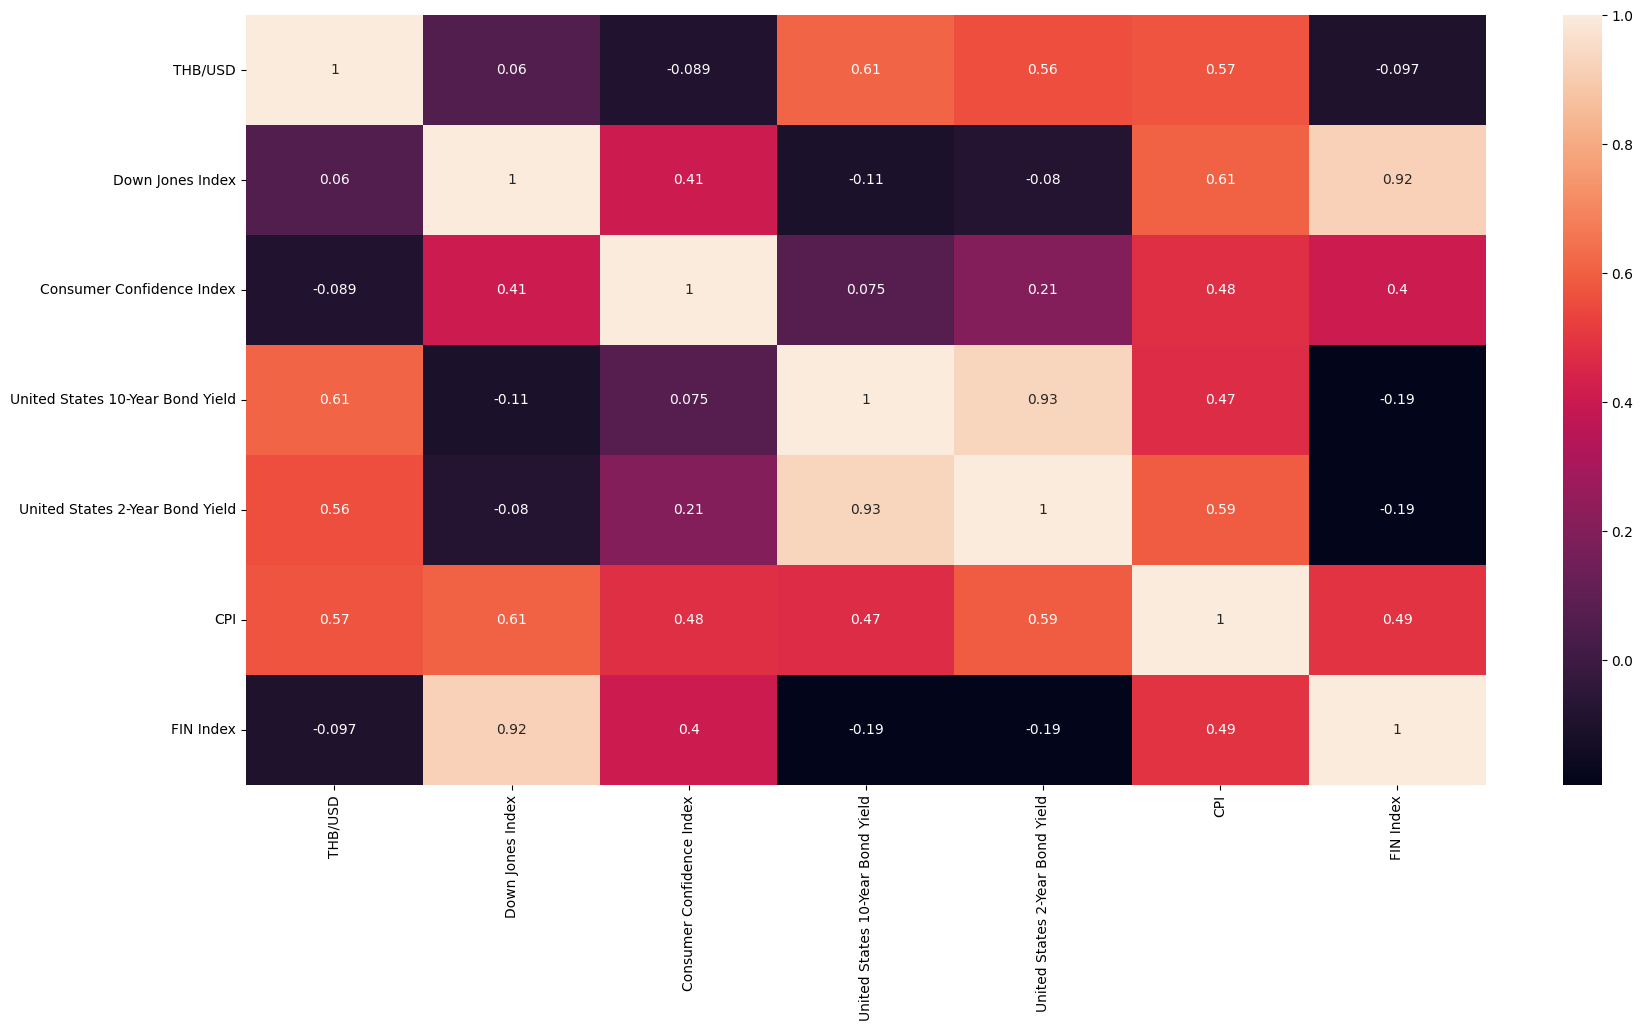

In [6]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True)

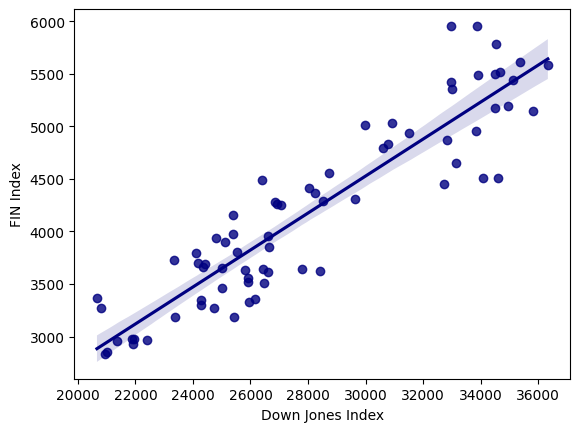

In [7]:
sns.regplot(x = 'Down Jones Index', y = 'FIN Index', color = 'navy', data = train_df)
plt.show()

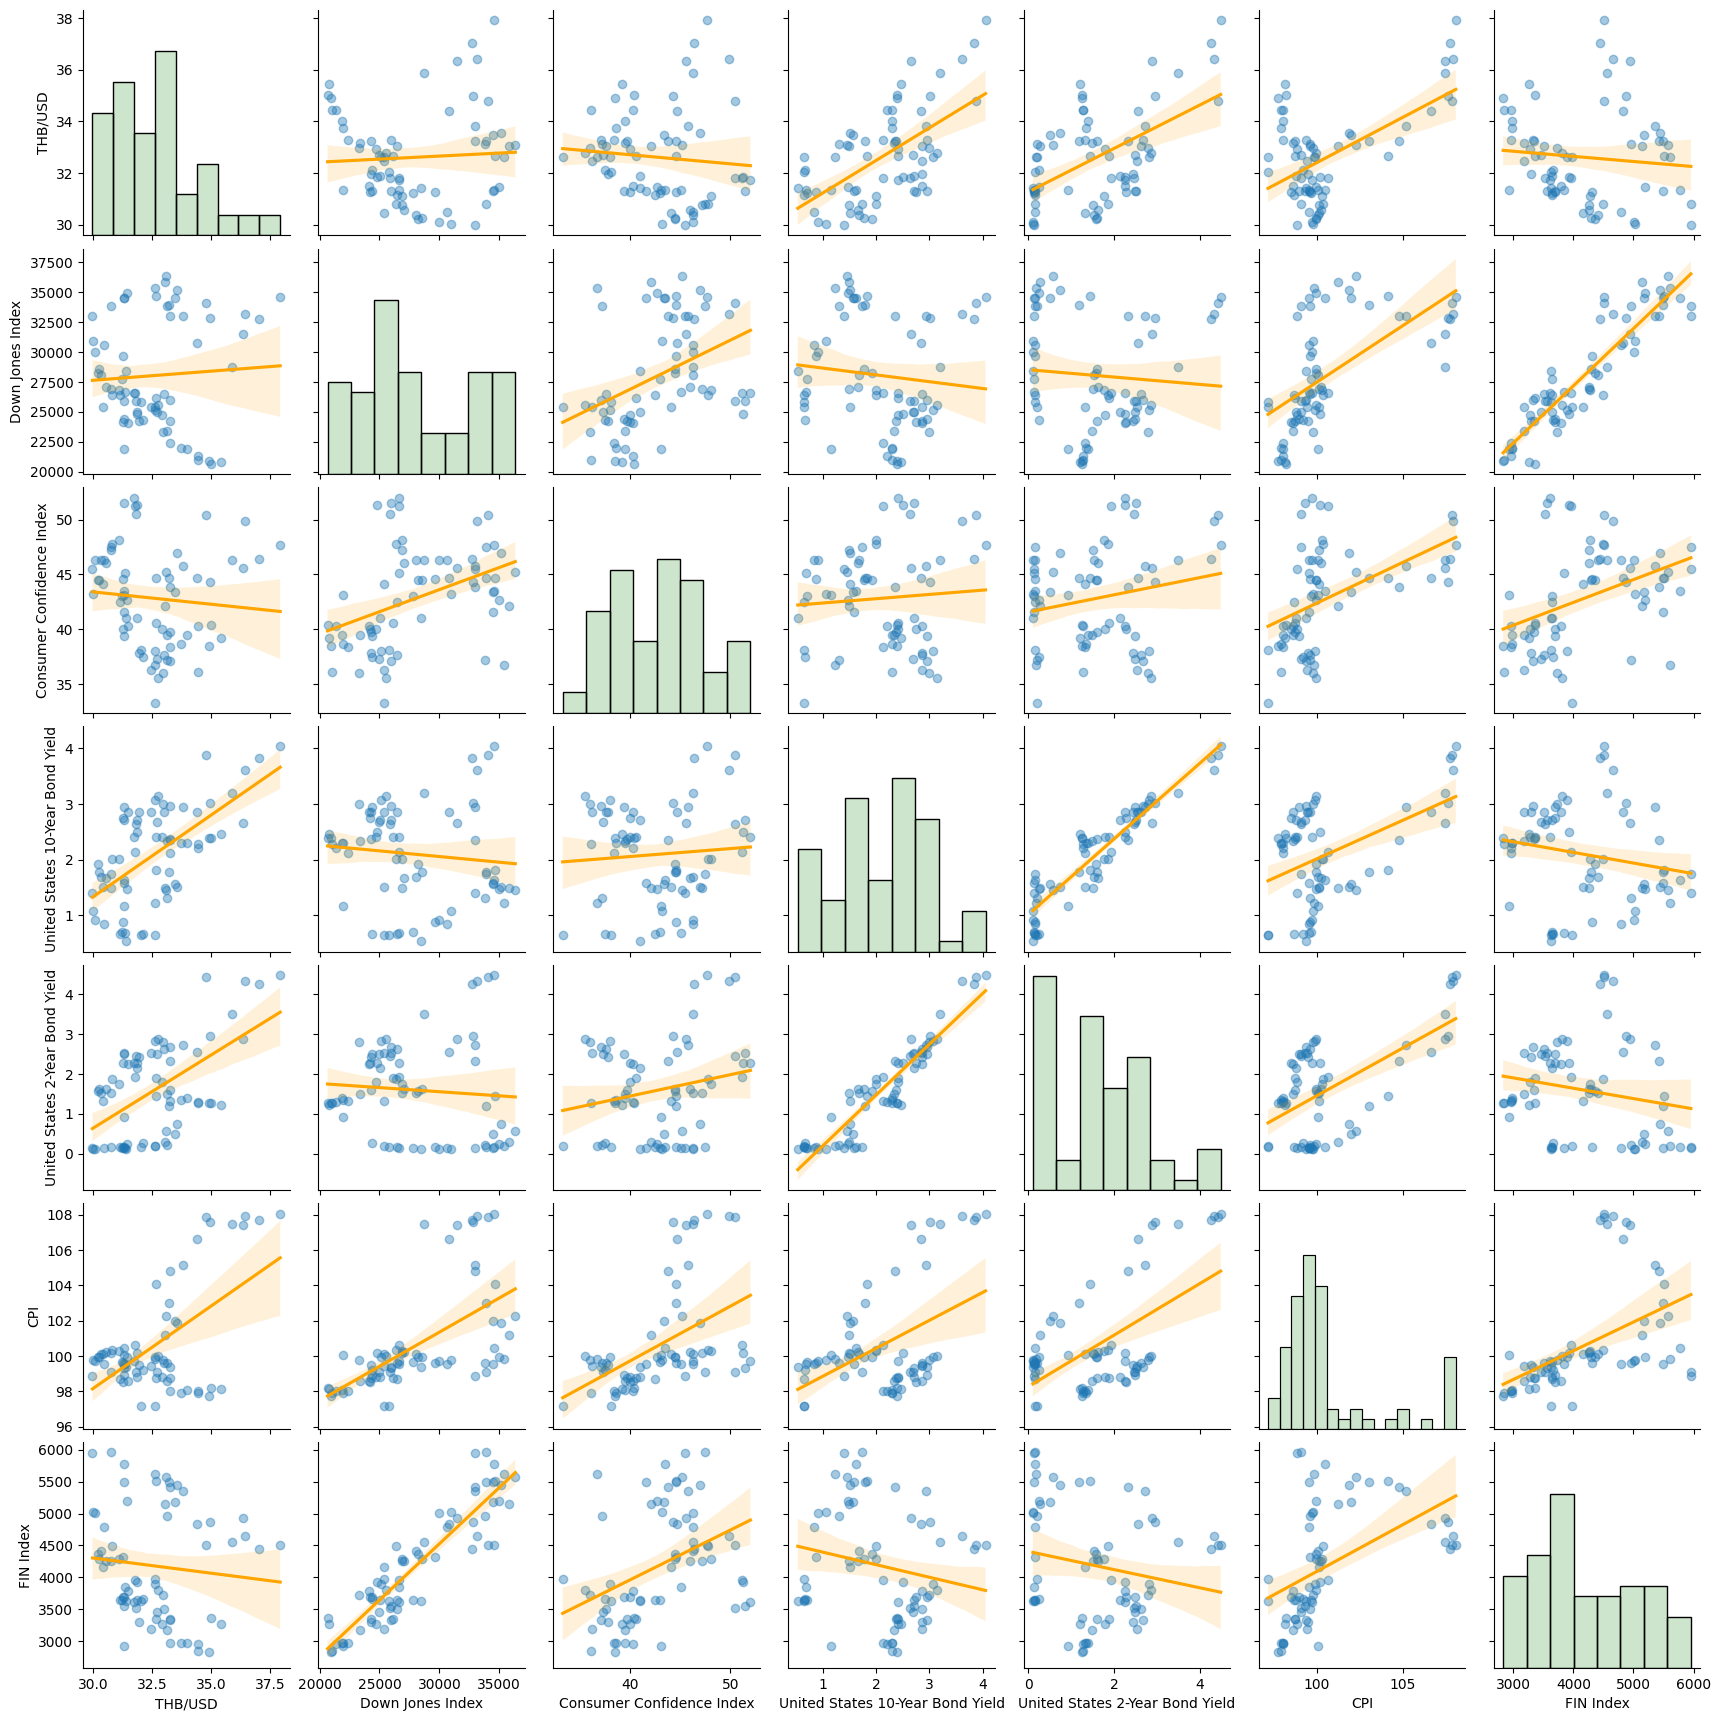

In [8]:
sns.pairplot(train_df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [9]:
x = train_df.drop(train_df[["FIN Index",'Date']], axis=1)
y = train_df["FIN Index"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score
# x = x.iloc[:,:-1]
# # y = y.iloc[:,-1]

# # Implementing cross validation
# k = 5
# kf = KFold(n_splits=k, random_state =None)
# # model = LinearRegression()

# # acc_score = []
# for train_index , test_index in kf.split(x):
#     x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
#     y_train , y_test = y[train_index] , y[test_index]
    
# #     model.fit(x_train,y_train)
# #     pred_values = model.predict(x_test)
     
# #     acc = accuracy_score(pred_values , y_test)
# #     acc_score.append(acc)
     
# # avg_acc_score = sum(acc_score)/k
 
# # print('accuracy of each fold - {}'.format(acc_score))
# # print('Avg accuracy : {}'.format(avg_acc_score))

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 22 to 51
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   THB/USD                           57 non-null     float64
 1   Down Jones Index                  57 non-null     float64
 2   Consumer Confidence Index         57 non-null     float64
 3   United States 10-Year Bond Yield  57 non-null     float64
 4   United States 2-Year Bond Yield   57 non-null     float64
 5   CPI                               57 non-null     float64
dtypes: float64(6)
memory usage: 3.1 KB


In [12]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 4 to 5
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   THB/USD                           15 non-null     float64
 1   Down Jones Index                  15 non-null     float64
 2   Consumer Confidence Index         15 non-null     float64
 3   United States 10-Year Bond Yield  15 non-null     float64
 4   United States 2-Year Bond Yield   15 non-null     float64
 5   CPI                               15 non-null     float64
dtypes: float64(6)
memory usage: 840.0 bytes


In [13]:
model = LinearRegression().fit(x_train, y_train)
print(model.intercept_) # Intercept
print(model.coef_) # slope

-6796.21657201817
[-1.72306829e+02  1.26308132e-01  4.75663069e+00  5.95667832e+02
 -5.58782199e+02  1.24375975e+02]


In [14]:
# returns the coefficient of determination, or R²
#  The higher the R² value, the better the fit. 
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9137272707628996
0.8215587914754501


In [15]:
x_train.head(3)

,THB/USD,Down Jones Index,Consumer Confidence Index,United States 10-Year Bond Yield,United States 2-Year Bond Yield,CPI
22,29.9857,32981.55,45.49,1.407,0.1289,98.88
56,31.3148,24415.84,39.40,2.955,2.4920,98.95
49,32.9695,23327.46,36.03,2.993,2.7966,99.76


In [16]:
model.predict([[30.5, 31951.54, 40.51, 3.43, 2.64, 99.85]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5163.75231502])

In [17]:
y_predicted = model.predict(x_test)
y_predicted

array([4186.47976585, 3534.493815  , 5564.5404879 , 5005.04543017,
       4278.90645148, 3658.21419472, 5396.54714119, 3393.61506343,
       5240.50435488, 3645.6796399 , 3750.53587154, 3508.90826567,
       4973.81545193, 3914.57975255, 4465.47037127])

In [18]:
dc = pd.concat([y_test.reset_index(), pd.Series(y_predicted, name='predicted')], axis='columns')
dc

,index,FIN Index,predicted
0,4,4557.26,4186.479766
1,62,3343.65,3534.493815
2,18,5190.60,5564.540488
3,0,4505.07,5005.045430
4,28,3646.06,4278.906451
5,50,3804.90,3658.214195
6,10,5512.82,5396.547141
7,34,2927.57,3393.615063
8,12,5444.83,5240.504355
9,54,3186.61,3645.679640


In [19]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_predicted, y_test, squared=False)
rms

369.45430001887206

In [27]:
# well-known regression algorithms to create models that fit your data:
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
model = Ridge(alpha=1).fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9099166774638834
0.8133121741040932


In [28]:
model = linear_model.Lasso(alpha=1).fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9136137664955686
0.8204903140331725


In [21]:
model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9996648250114171
0.7818418431964226


In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9842336742427256
0.8022563585601832
